In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.ensemble import IsolationForest

/Users/yogithapalukuri/Desktop/capstone_project/myvenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('df_clean_v2.csv')

In [3]:
anomaly_columns = ['tank100_temperature', 'tank200_temperature', 'tank300_temperature',
       'tank400_temperature', 'tank100_pressure', 'tank200_pressure',
       'tank300_pressure', 'tank400_pressure', 'all_tanks_station3_flow_rate', 
       'tank100_station4_flow_rate', 'tank200_station4_flow_rate', 'tank300_station4_flow_rate',
       'tank400_station4_flow_rate','tank100_station5_flow_rate','tank200_station5_flow_rate',
        'tank300_station5_flow_rate',
       'tank400_station5_flow_rate',
       ]

In [10]:
import pandas as pd

# For CSV files
historical_data = pd.read_csv('/Users/yogithapalukuri/Desktop/capstone_project/df_clean_v2.csv')

# Make sure the timestamp column is parsed as datetime type
historical_data['Timestamp'] = pd.to_datetime(historical_data['Timestamp'])


/var/folders/b9/79c0vj9575g01hz6pjr3n7800000gn/T/ipykernel_8436/3735878413.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


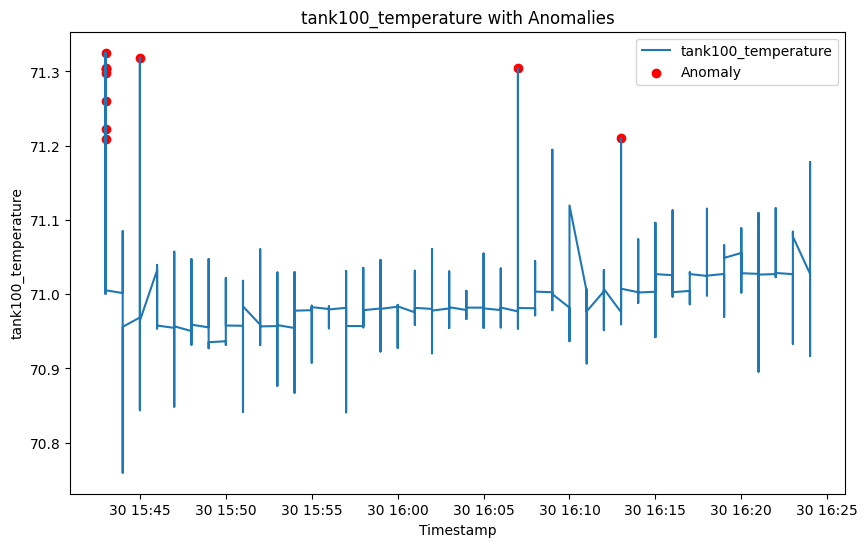

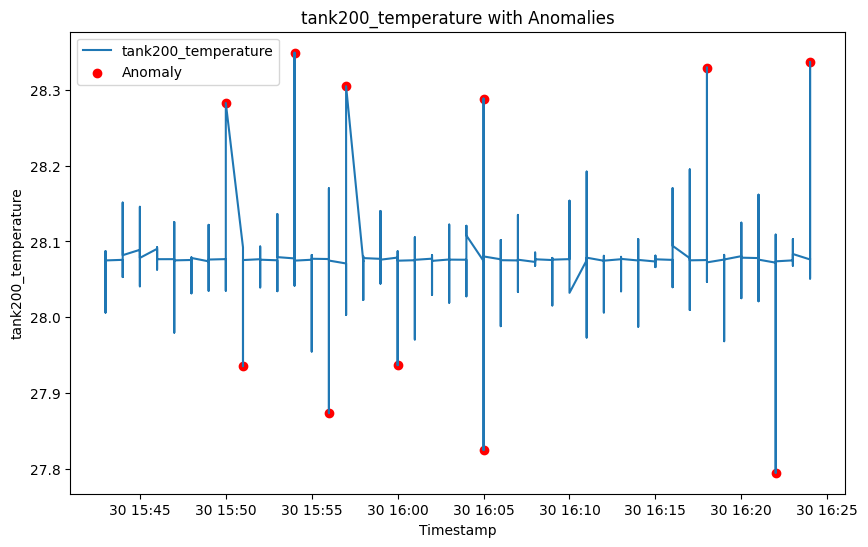

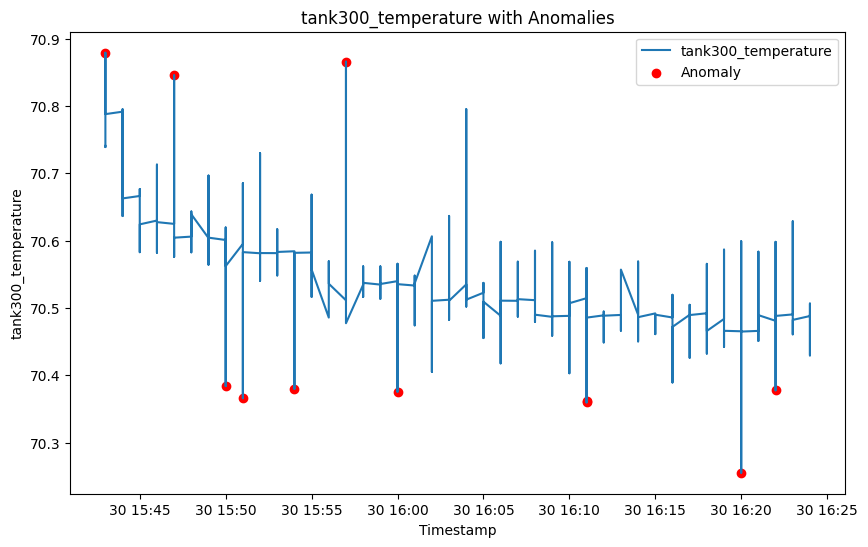

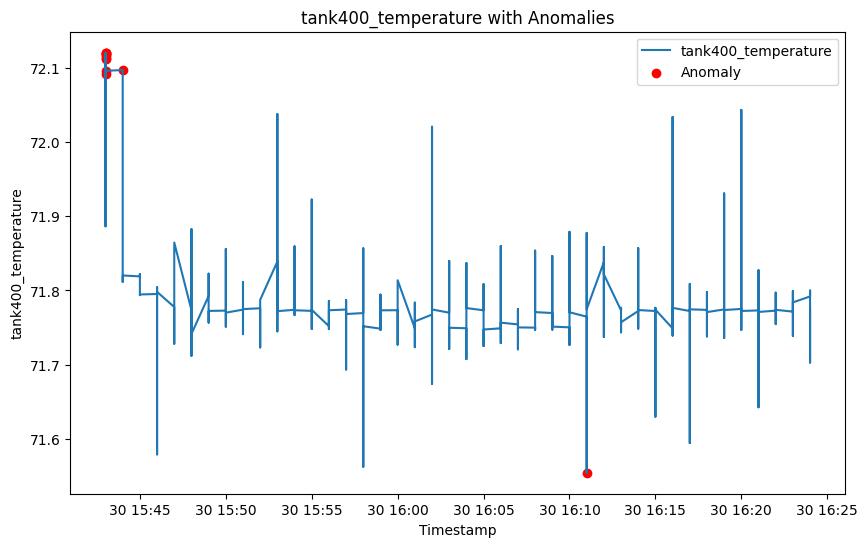

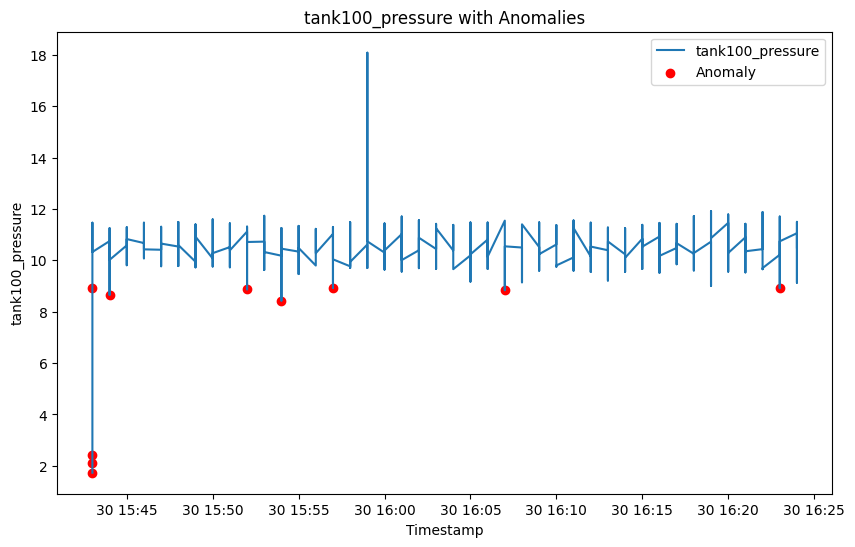

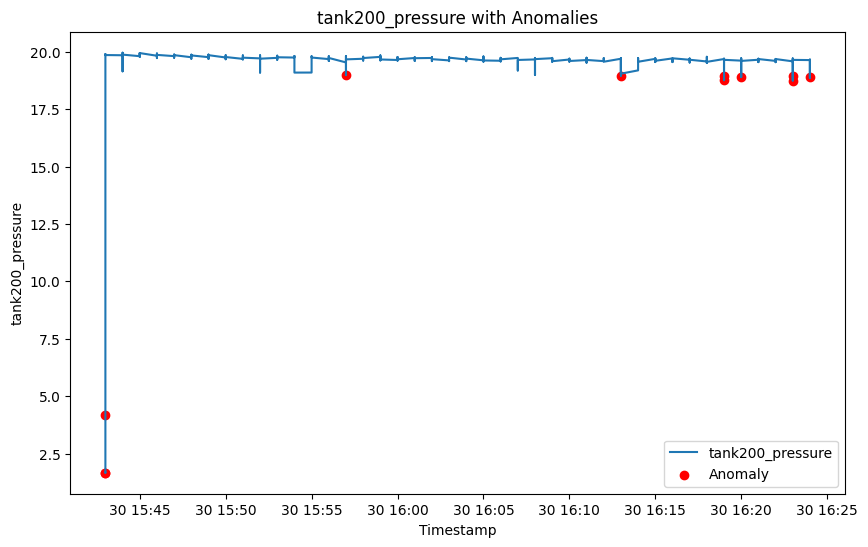

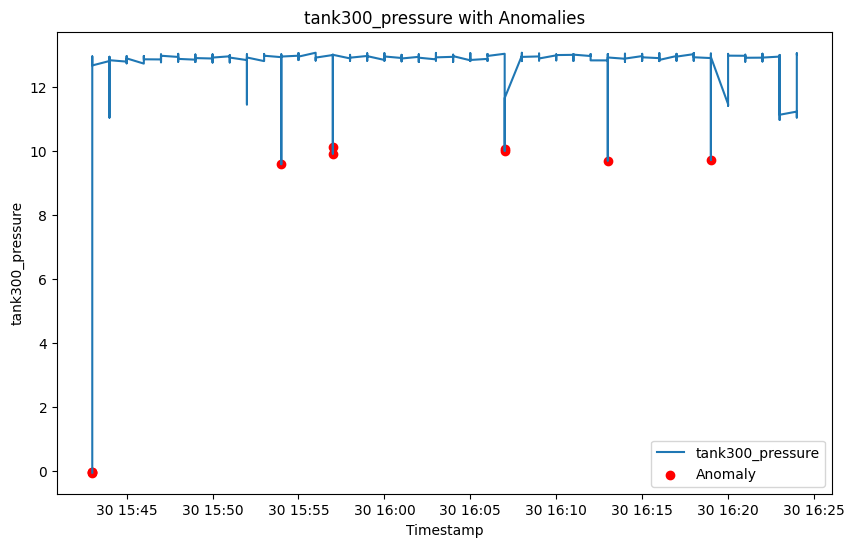

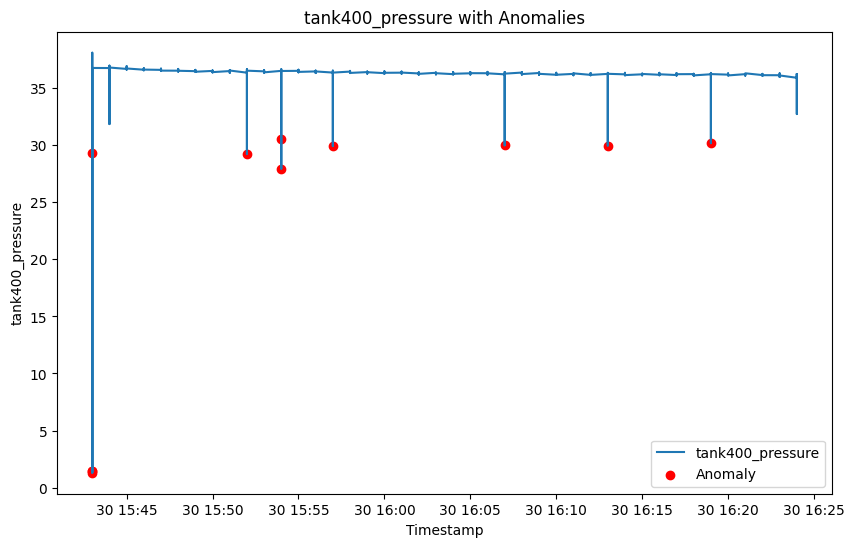

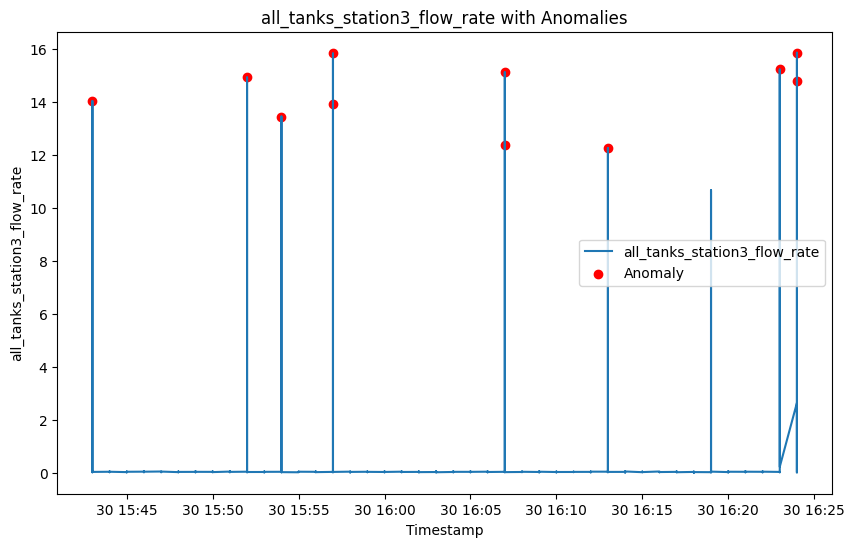

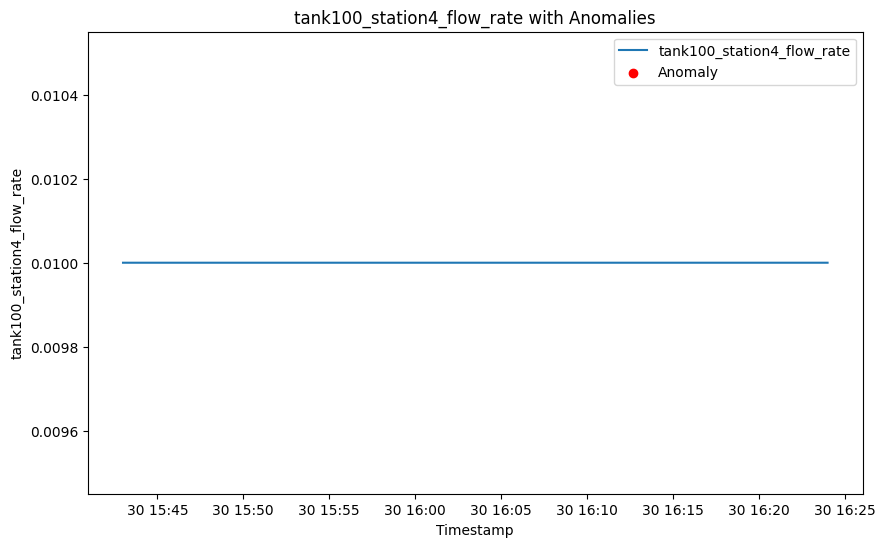

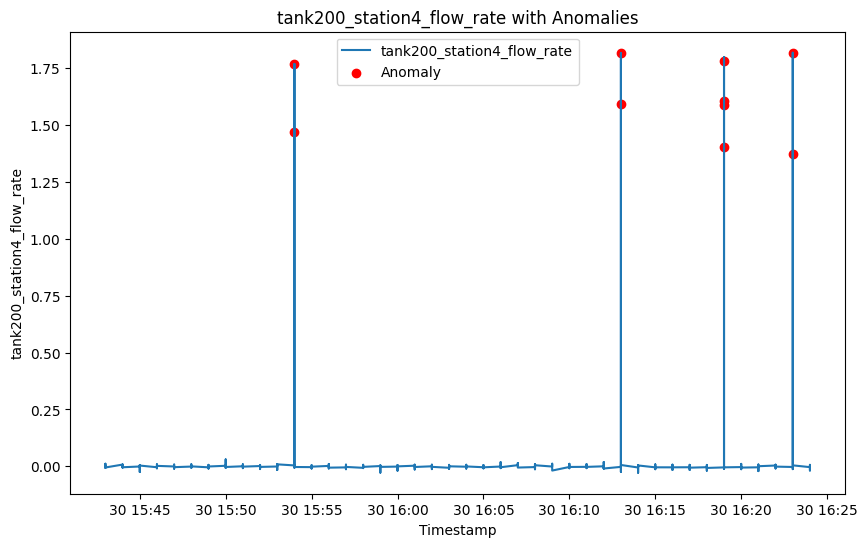

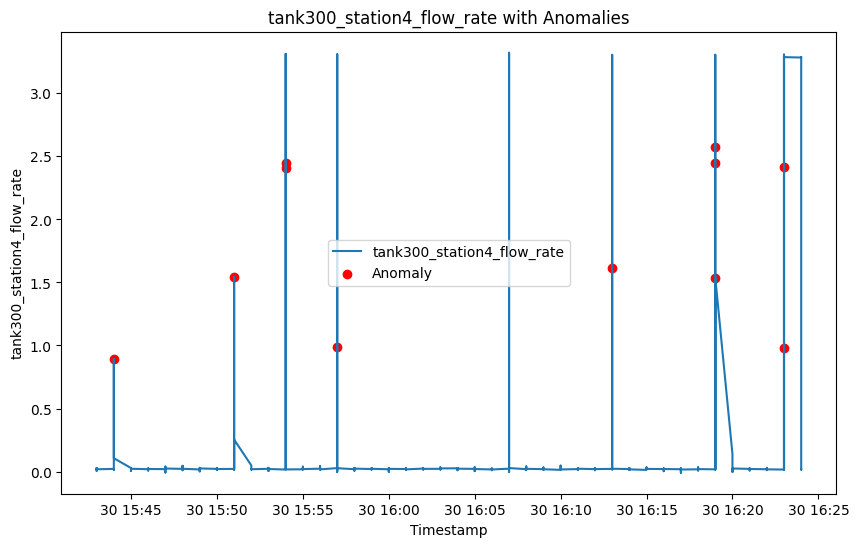

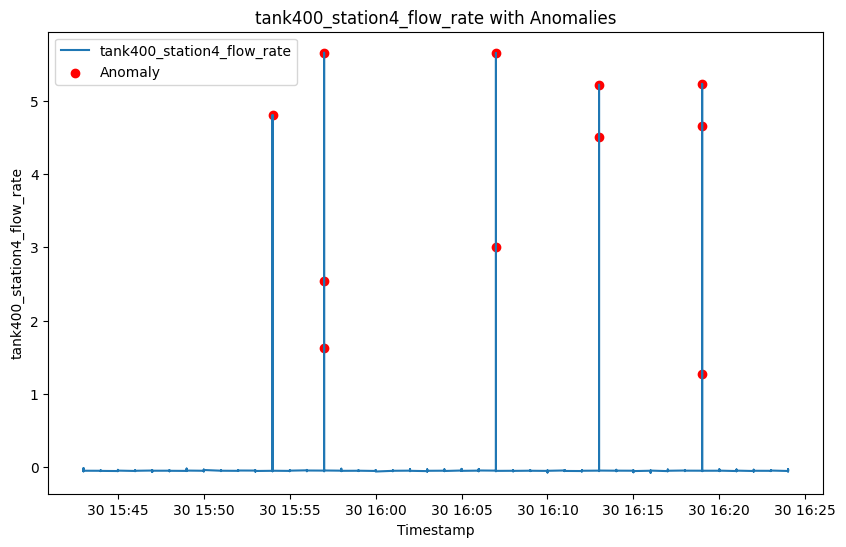

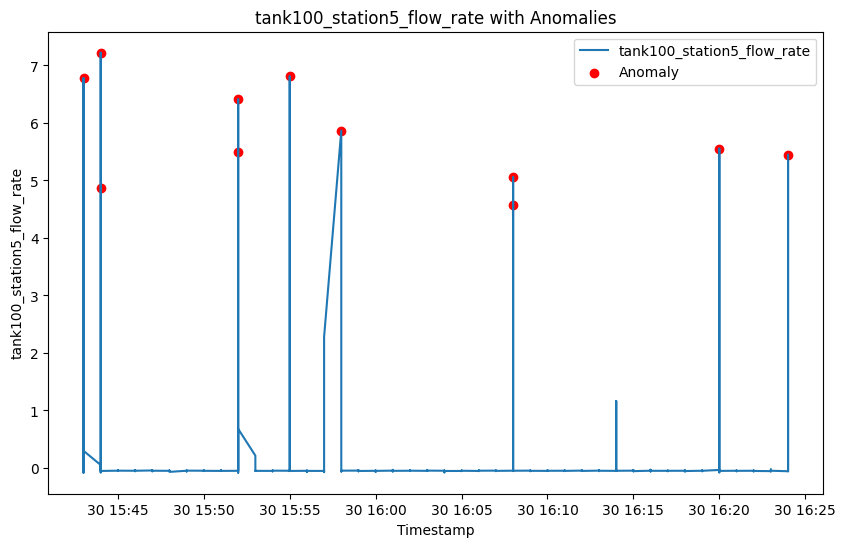

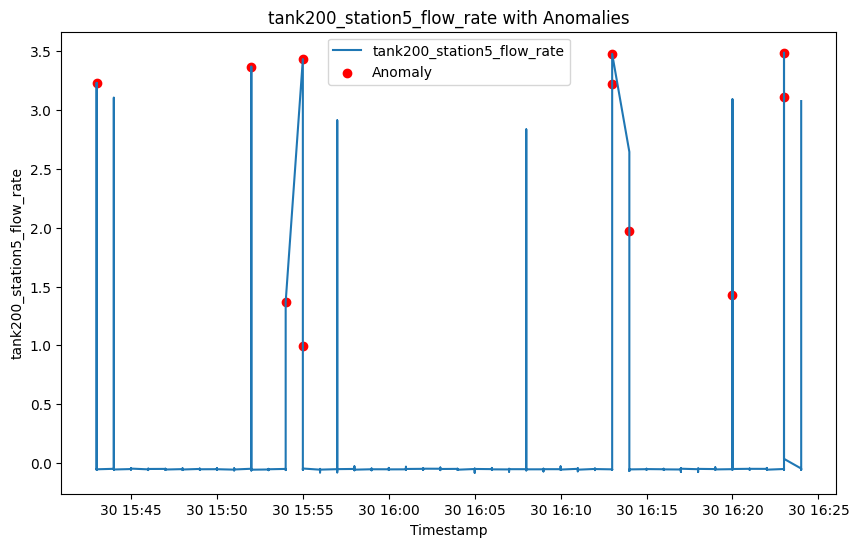

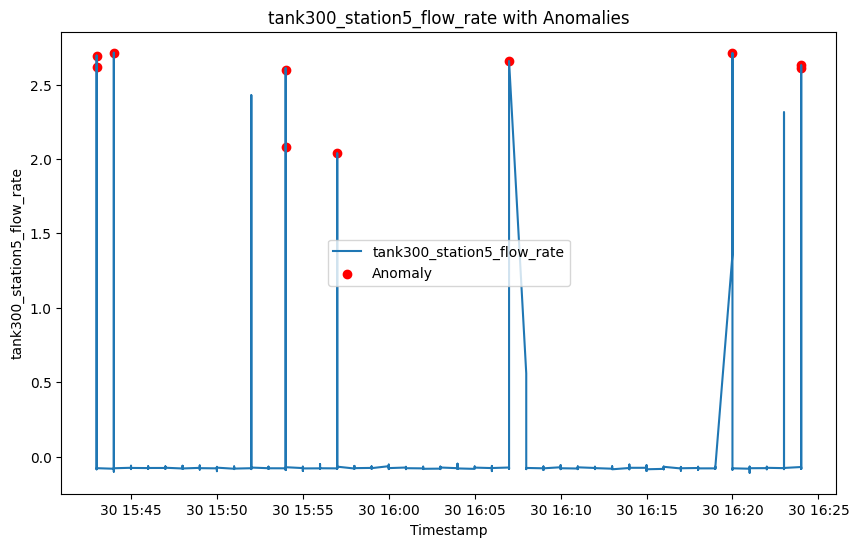

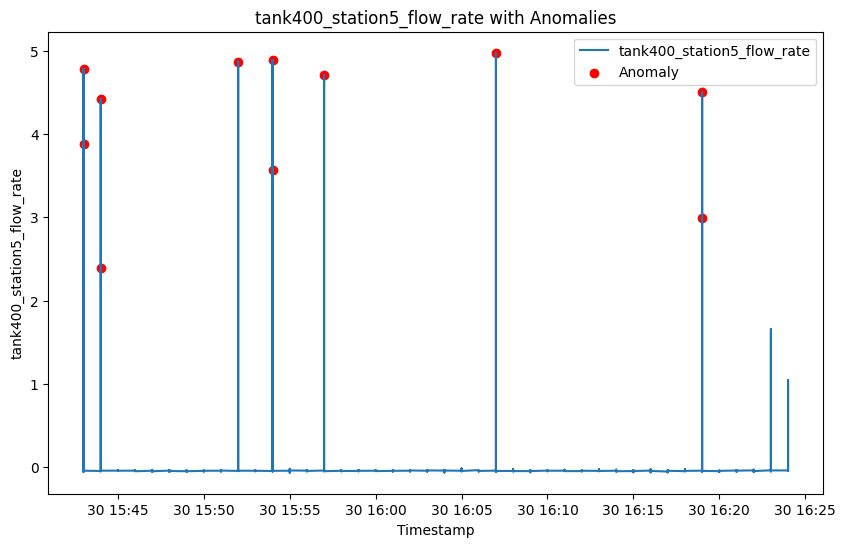

In [37]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load Historical Data
df = pd.read_csv('df_clean_v2.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# List of columns you want to check for anomalies
columns = [
    'tank100_temperature', 'tank200_temperature', 'tank300_temperature', 'tank400_temperature',
    'tank100_pressure', 'tank200_pressure', 'tank300_pressure', 'tank400_pressure',
    'all_tanks_station3_flow_rate', 'tank100_station4_flow_rate', 'tank200_station4_flow_rate',
    'tank300_station4_flow_rate', 'tank400_station4_flow_rate', 'tank100_station5_flow_rate',
    'tank200_station5_flow_rate', 'tank300_station5_flow_rate', 'tank400_station5_flow_rate'
]

# Perform anomaly detection for each column
for column in columns:
    # Fit Isolation Forest model
    model = IsolationForest(contamination=0.005)  # Adjust contamination based on expected outlier ratio
    model.fit(df[[column]])

    

    # Predict anomalies
    df[column + '_is_anomaly'] = model.predict(df[[column]])

    # Visualize Anomalies
    plt.figure(figsize=(10, 6))
    plt.plot(df['Timestamp'], df[column], label=column)
    anomalies = df[df[column + '_is_anomaly'] == -1]
    plt.scatter(anomalies['Timestamp'], anomalies[column], color='red', label='Anomaly')
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.title(f'{column} with Anomalies')
    plt.legend()
    plt.show()


In [7]:
# Save the forecast data to a CSV file
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecasted_temperatures.csv', index=False)


In [8]:
# Format the forecast to match the historical data structure
forecast_data = forecast[['ds', 'yhat']].rename(columns={'ds': 'Timestamp', 'yhat': 'tank100_temperature'})

# Continue the timestamp as a new column in the file
forecast_data['Timestamp'] = forecast_data['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Save the forecasted data to a CSV file
forecast_data.to_csv('forecast_data.csv', index=False)


In [20]:
from prophet import Prophet
import pandas as pd

# Let's assume 'df' is your main DataFrame containing historical data
columns_to_forecast = [
    'tank100_temperature', 'tank200_temperature', 'tank300_temperature', 'tank400_temperature',
    'tank100_pressure', 'tank200_pressure', 'tank300_pressure', 'tank400_pressure',
    'all_tanks_station3_flow_rate', 'tank100_station4_flow_rate', 'tank200_station4_flow_rate',
    'tank300_station4_flow_rate', 'tank400_station4_flow_rate', 'tank100_station5_flow_rate',
    'tank200_station5_flow_rate', 'tank300_station5_flow_rate', 'tank400_station5_flow_rate'
]

forecasts = []

# Forecast each column
for column in columns_to_forecast:
    df_prophet = df[['Timestamp', column]].dropna().rename(columns={'Timestamp': 'ds', column: 'y'})
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=300, freq='S')
    forecast = model.predict(future)
    forecast_renamed = forecast[['ds', 'yhat']].rename(columns={'yhat': column})
    forecasts.append(forecast_renamed)

# Combine all forecasts into one DataFrame based on 'ds' (timestamps)
from functools import reduce
combined_forecast = reduce(lambda left, right: pd.merge(left, right, on='ds'), forecasts)

# Save the combined forecast DataFrame to a CSV file
combined_forecast.to_csv('combined_forecast_data.csv', index=False)


17:59:35 - cmdstanpy - INFO - Chain [1] start processing


17:59:35 - cmdstanpy - INFO - Chain [1] done processing
/Users/yogithapalukuri/Desktop/capstone_project/myvenv/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  dates = pd.date_range(
17:59:35 - cmdstanpy - INFO - Chain [1] start processing
17:59:36 - cmdstanpy - INFO - Chain [1] done processing
/Users/yogithapalukuri/Desktop/capstone_project/myvenv/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  dates = pd.date_range(
17:59:36 - cmdstanpy - INFO - Chain [1] start processing
17:59:36 - cmdstanpy - INFO - Chain [1] done processing
/Users/yogithapalukuri/Desktop/capstone_project/myvenv/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  dates = pd.date_range(
17:59:36 - cm

In [21]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the combined forecast data
combined_forecast = pd.read_csv('combined_forecast_data.csv')

# Data Preparation (if needed)
combined_forecast['ds'] = pd.to_datetime(combined_forecast['ds'])

# Extract features (if needed)
X = combined_forecast.drop(columns=['ds'])

# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Set contamination based on your expected anomaly rate
model.fit(X)

# Anomaly Detection
combined_forecast['anomaly'] = model.predict(X)

# Save or Visualize Anomalies
combined_forecast.to_csv('combined_forecast_with_anomalies.csv', index=False)


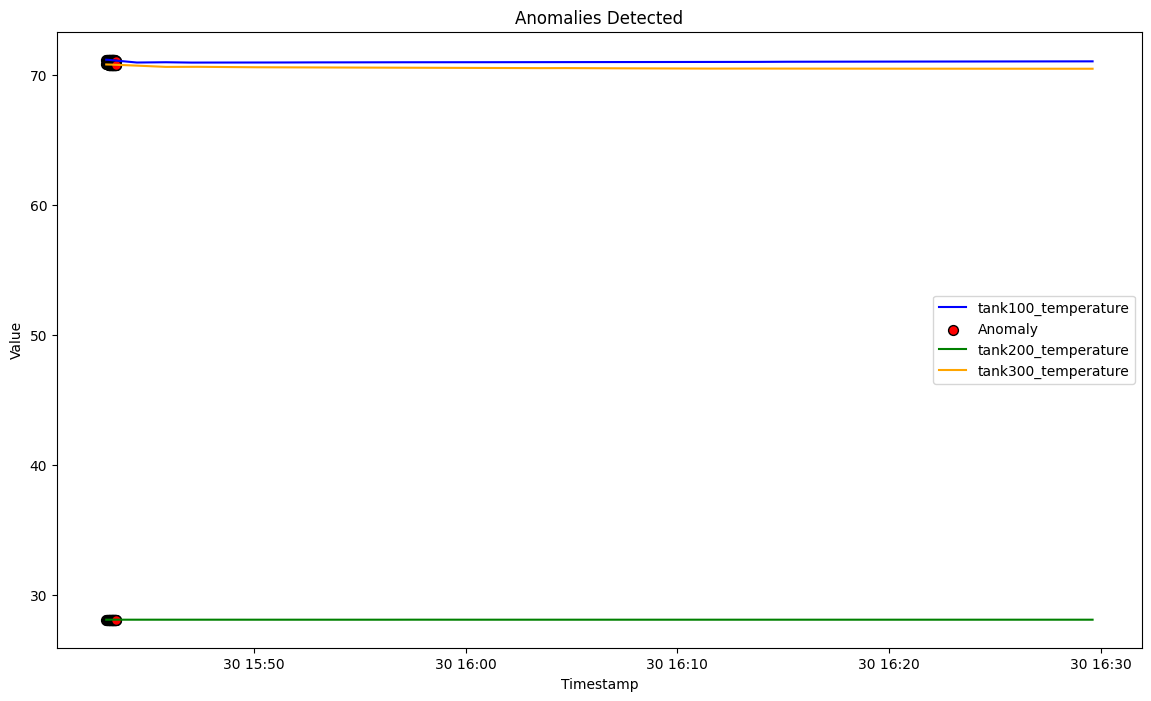

Anomaly Detection Rate: 1.02%


In [32]:


import matplotlib.pyplot as plt

# Applying a rolling mean to smooth the data
window_size = 3  # Change the window size based on your data's frequency and characteristics
for column in combined_forecast.columns:
    if 'temperature' in column or 'pressure' in column or 'flow_rate' in column:  # Apply only to specific columns
        combined_forecast[column] = combined_forecast[column].rolling(window=window_size, min_periods=1).mean()

def plot_anomalies(df, columns_to_plot):
    plt.figure(figsize=(14, 8))
    colors = ['blue', 'green', 'orange', 'red', 'purple']  # Add more colors if needed
    anomaly_shown = False
    for idx, column in enumerate(columns_to_plot):
        plt.plot(df['ds'], df[column], label=column, color=colors[idx % len(colors)])
        anomalies = df[df['anomaly'] == -1]
        if anomalies.empty:
            continue
        if not anomaly_shown:  # Only add the anomaly label once
            plt.scatter(anomalies['ds'], anomalies[column], color='red', s=50, edgecolor='black', label='Anomaly')
            anomaly_shown = True
        else:
            plt.scatter(anomalies['ds'], anomalies[column], color='red', s=50, edgecolor='black')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('Anomalies Detected')
    plt.legend()
    plt.show()

# Now re-run the anomaly detection and plotting

# Calculate detection rate
def calculate_detection_rate(df):
    total_points = len(df)
    anomalies_detected = len(df[df['anomaly'] == -1])
    detection_rate = (anomalies_detected / total_points) * 100
    return detection_rate

# Visualize anomalies on the selected columns
columns_to_plot = ['tank100_temperature', 'tank200_temperature', 'tank300_temperature']
plot_anomalies(combined_forecast, columns_to_plot)

# Calculate detection rate
detection_rate = calculate_detection_rate(combined_forecast)
print(f"Anomaly Detection Rate: {detection_rate:.2f}%")


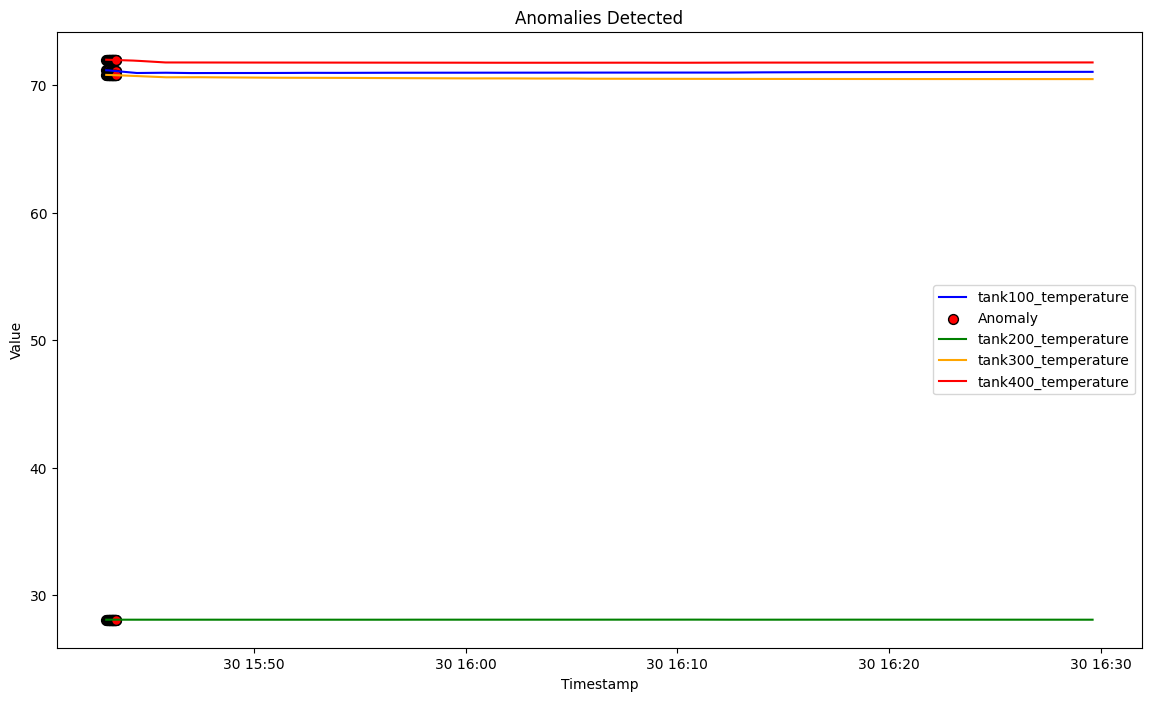

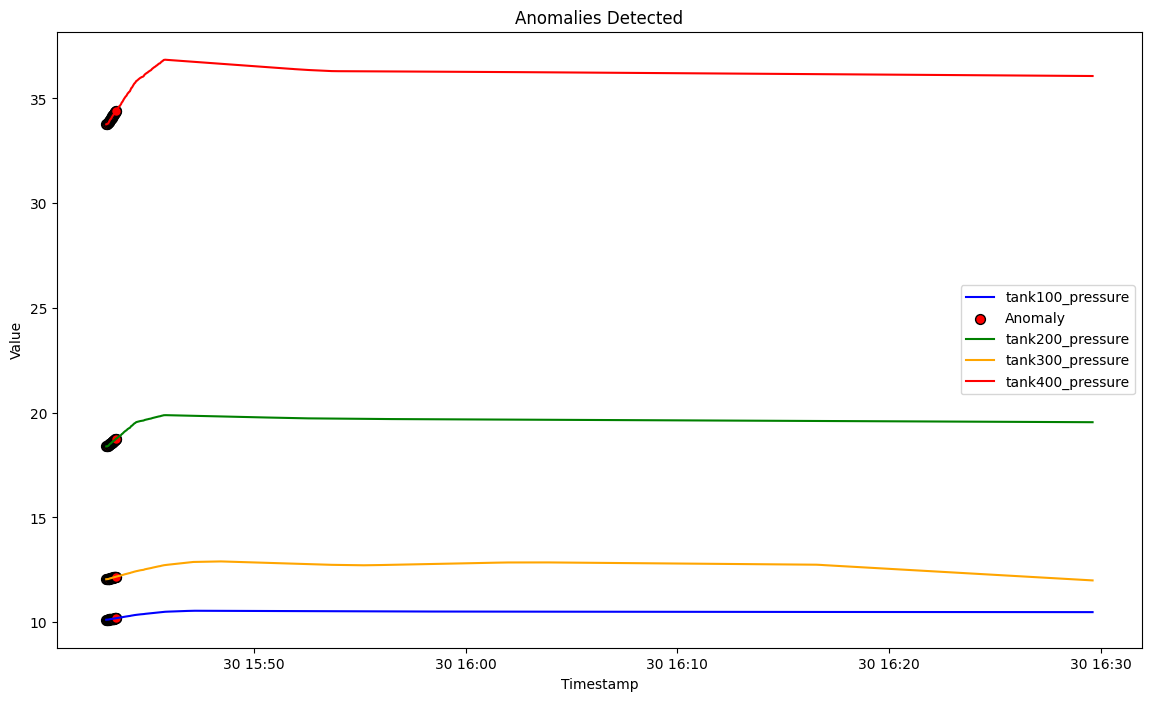

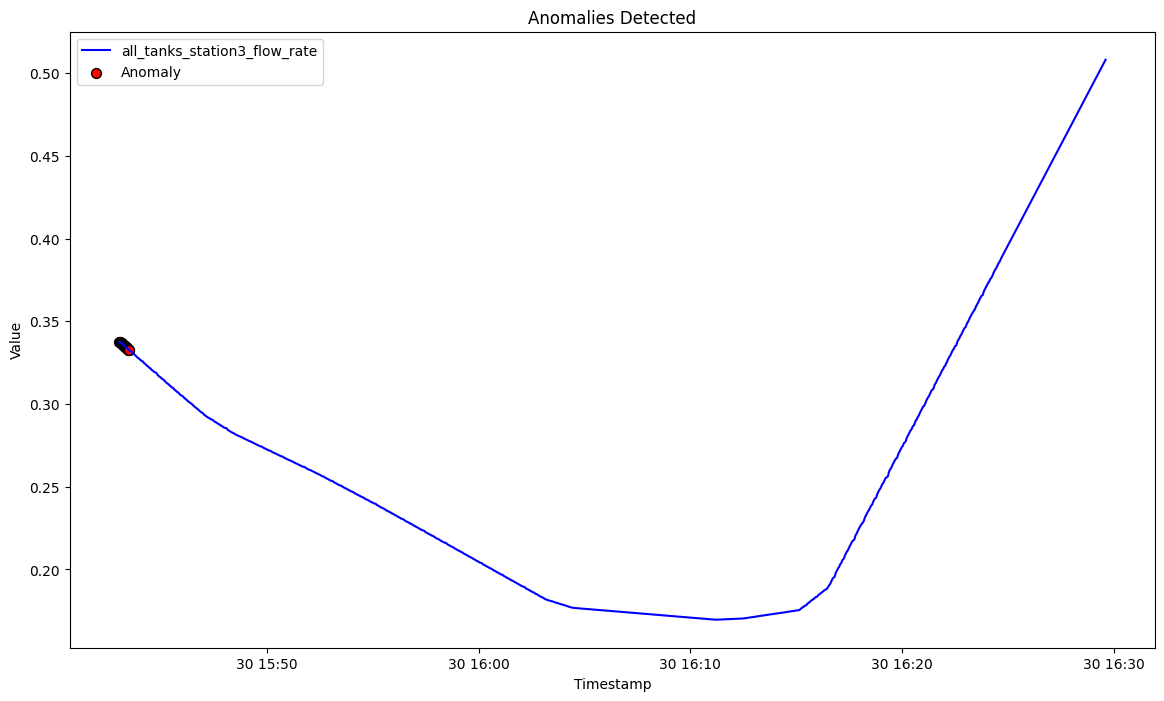

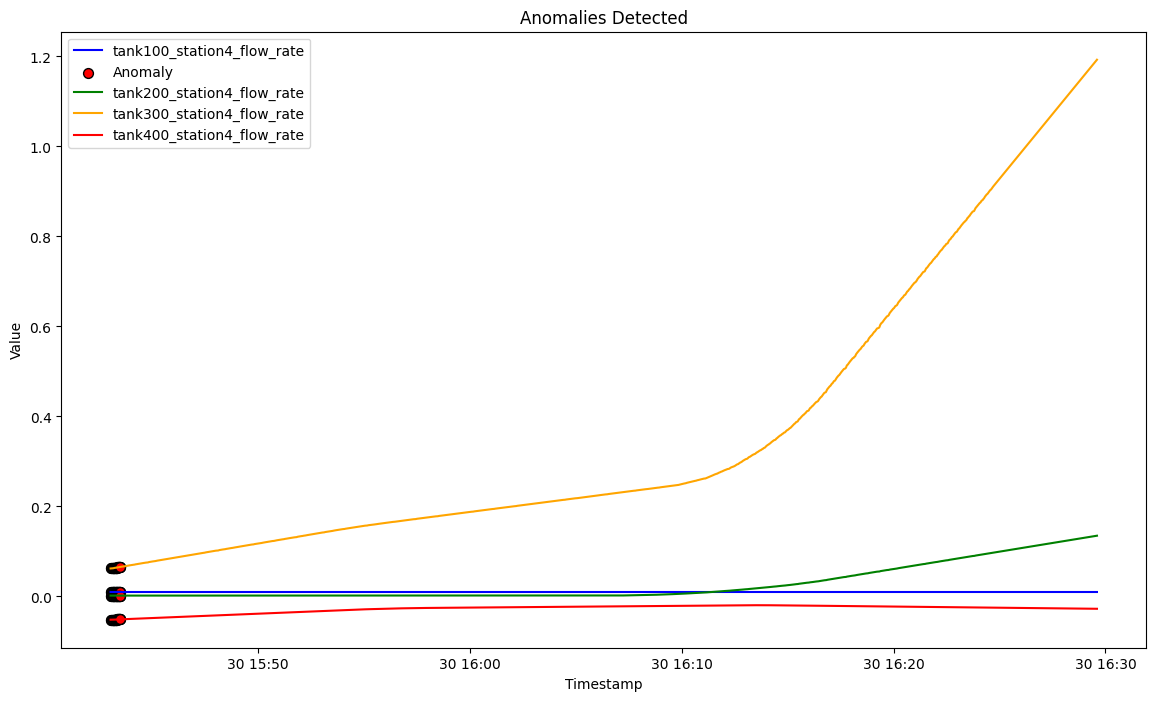

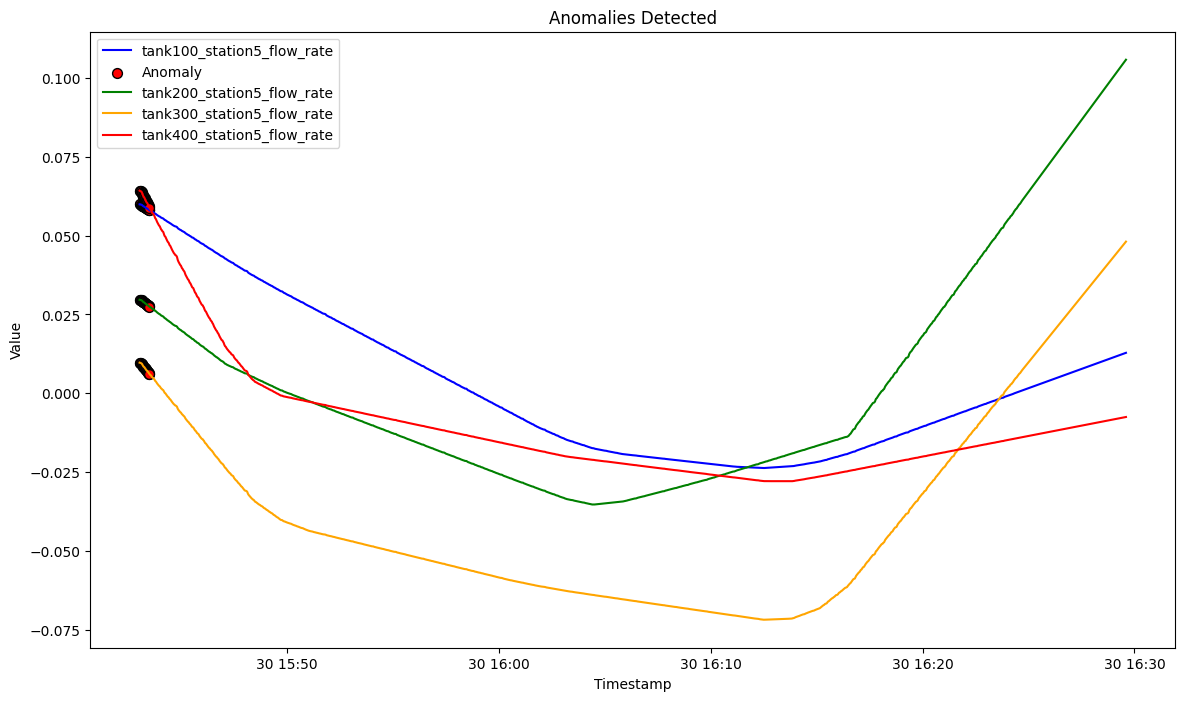

In [33]:
# Define columns for temperatures, pressures, and flow rates for each station
temperature_columns = [f'tank{i}_temperature' for i in range(100, 500, 100)]
pressure_columns = [f'tank{i}_pressure' for i in range(100, 500, 100)]
station3_flow_columns = ['all_tanks_station3_flow_rate']
station4_flow_columns = [f'tank{i}_station4_flow_rate' for i in range(100, 500, 100)]
station5_flow_columns = [f'tank{i}_station5_flow_rate' for i in range(100, 500, 100)]

# Visualize anomalies for temperatures
plot_anomalies(combined_forecast, temperature_columns)

# Visualize anomalies for pressures
plot_anomalies(combined_forecast, pressure_columns)

# Visualize anomalies for station 3 flow rates
plot_anomalies(combined_forecast, station3_flow_columns)

# Visualize anomalies for station 4 flow rates
plot_anomalies(combined_forecast, station4_flow_columns)

# Visualize anomalies for station 5 flow rates
plot_anomalies(combined_forecast, station5_flow_columns)
